In [1]:
# data checker

In [3]:
import os
from collections import Counter
import matplotlib.pyplot as plt

In [ ]:
 ds = "Military objects in military environments/Dataset"
#ds = f"military drones images"

train_dataset = f"D:/23b6034/FYP/datasets/{ds}/train/labels"
test_dataset = f"D:/23b6034/FYP/datasets/{ds}/test/labels"
val_dataset = f"D:/23b6034/FYP/datasets/{ds}/valid/labels"

In [ ]:
bigdataset = {
    0 : "Tank",
    1 : "drone",
    2 : "people",
    3 : "soldier"
}

smalldataset = {
    0 : "-",
    1 : "BBM",
    2 : "BMP",
    3 : "BTR",
    4 :"CAY",
    5 : "MTLB",
    6 : "Shishiga", 
    7 : "buhanka",
    8 : "soldier",
    9: "tank",
    10 :"truck"
}


Processed 5591 txt files
Total lines processed: 13377
Total integers extracted: 13377

Distribution of first integers:
------------------------------
Integer 0: 4895 occurrences (36.6%)
Integer 1: 1025 occurrences (7.7%)
Integer 2: 4474 occurrences (33.4%)
Integer 3: 2983 occurrences (22.3%)


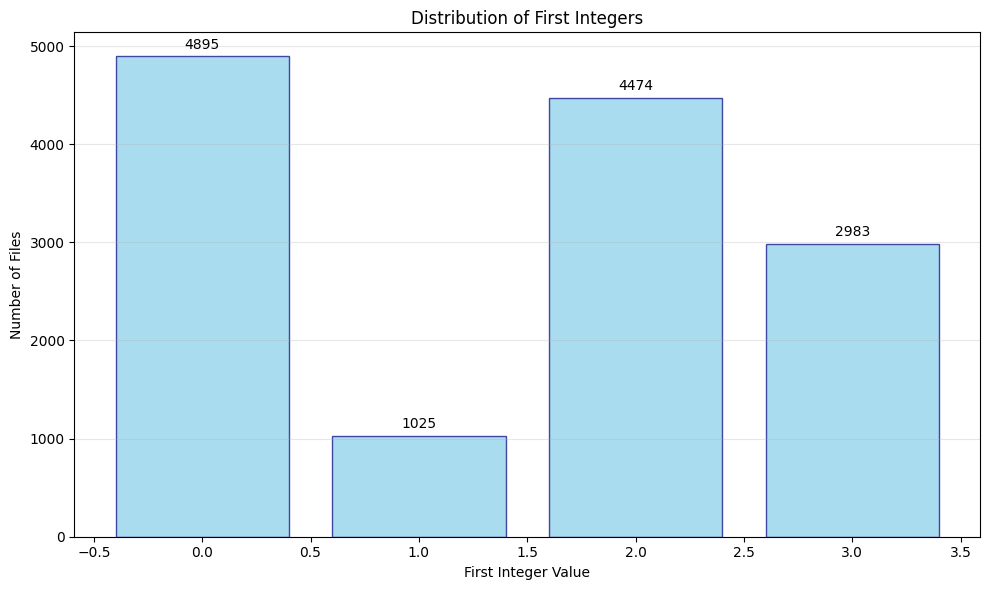

In [13]:
import os
from collections import Counter
import matplotlib.pyplot as plt

def analyze_first_integer_distribution(folder_path):
    """
    Loads all txt files from a folder, extracts the first integer from each line,
    and displays the distribution.
    
    Args:
        folder_path (str): Path to the folder containing txt files
    
    Returns:
        dict: Dictionary with integer values as keys and their counts as values
    """
    first_integers = []
    processed_files = 0
    total_lines_processed = 0
    
    # Check if folder exists
    if not os.path.exists(folder_path):
        print(f"Error: Folder '{folder_path}' does not exist.")
        return {}
    
    # Process each txt file in the folder
    for filename in os.listdir(folder_path):
        if filename.endswith('.txt'):
            file_path = os.path.join(folder_path, filename)
            lines_in_file = 0
            try:
                with open(file_path, 'r') as file:
                    # Read all lines in the file
                    for line in file:
                        line = line.strip()
                        if line:  # Skip empty lines
                            # Extract the first element and convert to integer
                            first_element = line.split()[0]
                            first_integer = int(first_element)
                            first_integers.append(first_integer)
                            lines_in_file += 1
                            total_lines_processed += 1
                
                if lines_in_file > 0:
                    processed_files += 1
                    
            except (ValueError, IndexError) as e:
                print(f"Warning: Could not process file '{filename}': {e}")
            except IOError as e:
                print(f"Warning: Could not read file '{filename}': {e}")
    
    if not first_integers:
        print("No valid integers found in any txt files.")
        return {}
    
    # Count the distribution
    distribution = Counter(first_integers)
    
    # Print results
    print(f"\nProcessed {processed_files} txt files")
    print(f"Total lines processed: {total_lines_processed}")
    print(f"Total integers extracted: {len(first_integers)}")
    print("\nDistribution of first integers:")
    print("-" * 30)
    
    # Sort by integer value for better readability
    for integer in sorted(distribution.keys()):
        count = distribution[integer]
        percentage = (count / len(first_integers)) * 100
        print(f"Integer {integer}: {count} occurrences ({percentage:.1f}%)")
    
    return dict(distribution)

def plot_distribution(distribution_dict, title="Distribution of First Integers"):
    """
    Creates a bar plot of the distribution.
    
    Args:
        distribution_dict (dict): Dictionary with integers and their counts
        title (str): Title for the plot
    """
    if not distribution_dict:
        print("No data to plot.")
        return
    
    integers = sorted(distribution_dict.keys())
    counts = [distribution_dict[i] for i in integers]
    
    plt.figure(figsize=(10, 6))
    plt.bar(integers, counts, alpha=0.7, color='skyblue', edgecolor='navy')
    plt.xlabel('First Integer Value')
    plt.ylabel('Number of Files')
    plt.title(title)
    plt.grid(axis='y', alpha=0.3)
    
    # Add count labels on top of bars
    for i, count in enumerate(counts):
        plt.text(integers[i], count + 0.01 * max(counts), str(count), 
                ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Example usage:
if __name__ == "__main__":
    # Replace 'your_folder_path' with the actual path to your folder
    folder_path = train_dataset
    
    # Analyze the distribution
    distribution = analyze_first_integer_distribution(folder_path)
    
    # Optionally, create a visualization
    if distribution:
        plot_distribution(distribution)